<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/24_4_HW_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Обработка аудиосигналов](https://colab.research.google.com/drive/13r2TM72wK5mFSMsb1rBV4gspNCqkzJDY)
2. [Распознавание музыкального жанра](https://colab.research.google.com/drive/1VVV3EUT9uaVHNwZBweAsfOcDYwtPMJ2z)
3. Генерация музыкальных произведений с помощью НС
4. [Домашняя работа](https://colab.research.google.com/drive/1uZ-sCic9BV5quOohckycIqhYkl8MvvvV)

В данной части урока мы продемонстрируем как с помощью базы данных классической музыки и простейшей LSTM-сети создать нейронную сеть способную "сочинять" классическую музыку.

Для начала опишем простой алгоритм, который вы можете использовать для обучения своих моделей, изменив лишь датасет с исходными музыкальными файлами.

Создание нейросети, способной генерировать музыку, требует знаний в области глубокого обучения и обработки звука, а также доступа к вычислительным ресурсам. Рассмотрим общий шаг за шагом процесс создания такой нейросети:

1. **Выбор задачи и данных**: Решите, какой вид музыки вы хотите создавать (например, классическая, джаз, рок) и соберите набор данных, соответствующий вашей задаче. Этот набор данных должен содержать аудиозаписи ваших желаемых стилей музыки.

2. **Предобработка данных**: Аудиозаписи требуют предварительной обработки. Это включает в себя извлечение аудиофункций, таких как спектрограммы или мел-частотные кепстральные коэффициенты (MFCC), а также разбиение аудиозаписей на короткие фрагменты, называемые окнами.

3. **Архитектура модели**: Выберите архитектуру нейронной сети для генерации музыки. Один из популярных подходов - использовать рекуррентные нейронные сети (RNN) или вариации, такие как LSTM или GRU, которые способны учитывать последовательность данных. Для обработки аудио также можно использовать сверточные нейронные сети (CNN).

4. **Обучение модели**: Обучите вашу нейронную сеть на подготовленных данных. Важно иметь множество вычислительных ресурсов, чтобы справиться с вычислительно интенсивной задачей обучения.

5. **Функция потерь и метрики**: Определите функцию потерь (loss function) для оценки качества генерируемой музыки и выберите метрики для оценки производительности модели.

6. **Генерация музыки**: После обучения модели можно использовать ее для генерации музыки. Это можно сделать, предсказывая следующий звуковой фрагмент на основе предыдущих.

7. **Оценка и настройка**: Оцените результаты генерации музыки и, при необходимости, настройте модель и повторите процесс обучения.

8. **Использование модели**: После достижения удовлетворительных результатов вы можете использовать вашу модель для генерации музыки в соответствии с вашими потребностями.

Обратите внимание, что создание нейросети для генерации музыки - это сложная задача, требующая знаний в области машинного обучения и звуковой обработки, а также доступа к мощным вычислительным ресурсам. Большинство успешных проектов в этой области требуют нескольких месяцев или даже лет разработки и оптимизации модели. Но можно учиться и на готовых примерах!


## Импорт библиотек

In [15]:
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth
!pip install --upgrade music21
!pip install --upgrade pretty_midi


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fluidsynth is already the newest version (2.2.5-1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 67.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.8 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=02eeeae58f955eedcc857ed47cf62b6d6931eec55370a464f11f08eacee18778
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [12]:
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 2 RELEASES FOR UBUNTU 12.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore-stable
  sudo apt-get update
  sudo apt-get install musescore

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be updated

In [2]:
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 7,815 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

In [13]:
from music21 import *

# настраиваем окружение в соответствии с документацией
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

In [34]:
# Импортируем библиотеки
import tensorflow
import os
import numpy as np
import pandas as pd
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import fluidsynth

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras.backend as K
from keras.optimizers import Adamax

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Optional

import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

## Загрузка данных

Набор данных содержит 337 классических фортепианных пьес 25 композиторов + 1 рождественскую песню. Общая длительность всех произведений 23,17 часа.

Датасет собран из MIDI файлов с сайта [Classical Piano MIDI](http://www.piano-midi.de/).



In [17]:
!wget https://storage.yandexcloud.net/academy.ai/classical-music-midi.zip

--2025-01-07 15:51:43--  https://storage.yandexcloud.net/academy.ai/classical-music-midi.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2751606 (2.6M) [application/x-zip-compressed]
Saving to: ‘classical-music-midi.zip.1’

classical-music-mid 100%[===================>]   2.62M  2.02MB/s    in 1.3s    

2025-01-07 15:51:45 (2.02 MB/s) - ‘classical-music-midi.zip.1’ saved [2751606/2751606]



In [6]:
# Разархивируем датасета во временную папку 'dataset'
!unzip -qo "classical-music-midi" -d ./dataset

In [7]:
!dir ./dataset

Albeniz    Borodin	Christmas  Granados  Mendelssohn  Rachmaninoff	Sinding
Bach	   Brahms	Clementi   Grieg     Moszkowski   Ravel		Tchaikovsky
Balakirev  Burgmueller	Debussy    Haydn     Mozart	  Schubert
Beethoven  Chopin	Godowsky   Liszt     Mussorgsky   Schumann


In [8]:
CLASS_LIST_HW = ["Chopin"]
CLASS_LIST_CTR = ["Mozart"]

In [9]:
def get_all_midi(class_list):
    all_midis = []
    for compositor in class_list:
        filepath = f"./dataset/{compositor}/"
        for i in os.listdir(filepath):
            if i.endswith(".mid"):
                tr = filepath + i

                # чтение и парсинг midi-файлов в Stream-объект библиотеки music21
                midi = converter.parse(tr)
                all_midis.append(midi)
    return all_midis


In [38]:

import os
import glob

def get_all_files(directory):
  """
  Returns a list of all file paths within a given directory.

  Args:
    directory: The path to the directory.

  Returns:
    A list of strings, where each string is a file path.
  """
  file_paths = []
  for root, _, files in os.walk(directory):
    for file in files:
      file_paths.append(os.path.join(root, file))
  return file_paths

In [18]:
all_midis = get_all_midi(CLASS_LIST_HW)
print("Общее количество midi-файлов:", len(all_midis))

Общее количество midi-файлов: 48


In [18]:
starters = get_all_midi(CLASS_LIST_CTR)
print("Общее количество midi-файлов:", len(starters))

Общее количество midi-файлов: 21


In [61]:
# функция преобразования MIDI в DataFrame, содержащий ноты и их расширенные параметры
instrument_name='Acoustic Grand Piano'
def midi_to_notes(midi_file: str):
  # чтение MIDI
  pm = pretty_midi.PrettyMIDI(midi_file)

  # извлечение первого инструмента
  print('Number of instruments:', len(pm.instruments))
  instrument = pm.instruments[0]
  instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
  print('Instrument name:', instrument_name)

  # объявляем список для хранения нот
  notes = []
  # сортируем ноты по времени начала ноты
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)

  # переменная для расчета шага, хранит предущее значение start
  prev_start = sorted_notes[0].start # начало первой ноты

  for note in sorted_notes:
    # начало ноты
    start = note.start
    # конец ноты
    end = note.end
    notes.append(
        dict(
            pitch=note.pitch,             # имя ноты
            start=note.start,             # начало ноты
            end=note.end,                 # конец ноты
            step=(start - prev_start),    # шаг
            duration=(end - start)        # длительность ноты
        )
    )

    prev_start = start # запоминаем значение предыдущего старта

  return pd.DataFrame(notes) # функция возвращает значение DataFrame библиотеки pandas

In [29]:
# Выбор произвольного MIDI файла
filepath = f"./dataset/Bach/bach_846.mid"

raw_notes = midi_to_notes(filepath)
raw_notes.head()

Number of instruments: 6
Instrument name: Acoustic Grand Piano


,pitch,start,end,step,duration
0,67,0.407095,0.609797,0.000000,0.202703
1,72,0.609797,0.812467,0.202703,0.202669
2,76,0.812467,0.991275,0.202669,0.178808
3,67,1.011176,1.213878,0.198709,0.202703
4,72,1.213878,1.416581,0.202703,0.202703


In [21]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

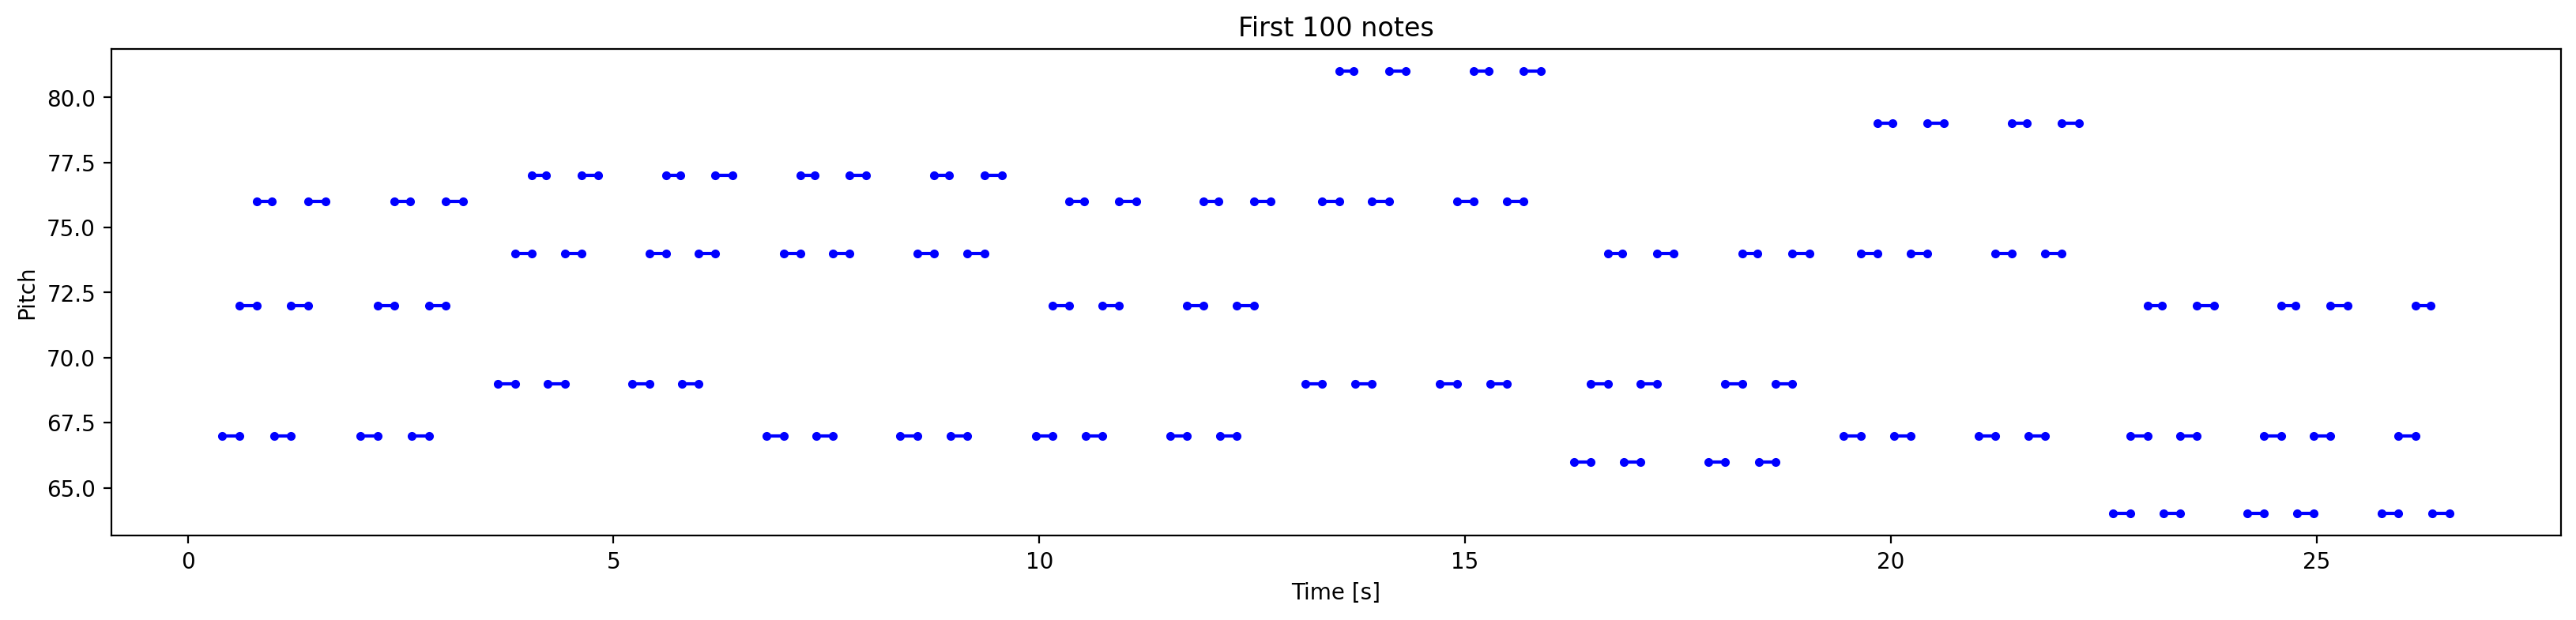

In [22]:
plot_piano_roll(raw_notes, count=100)

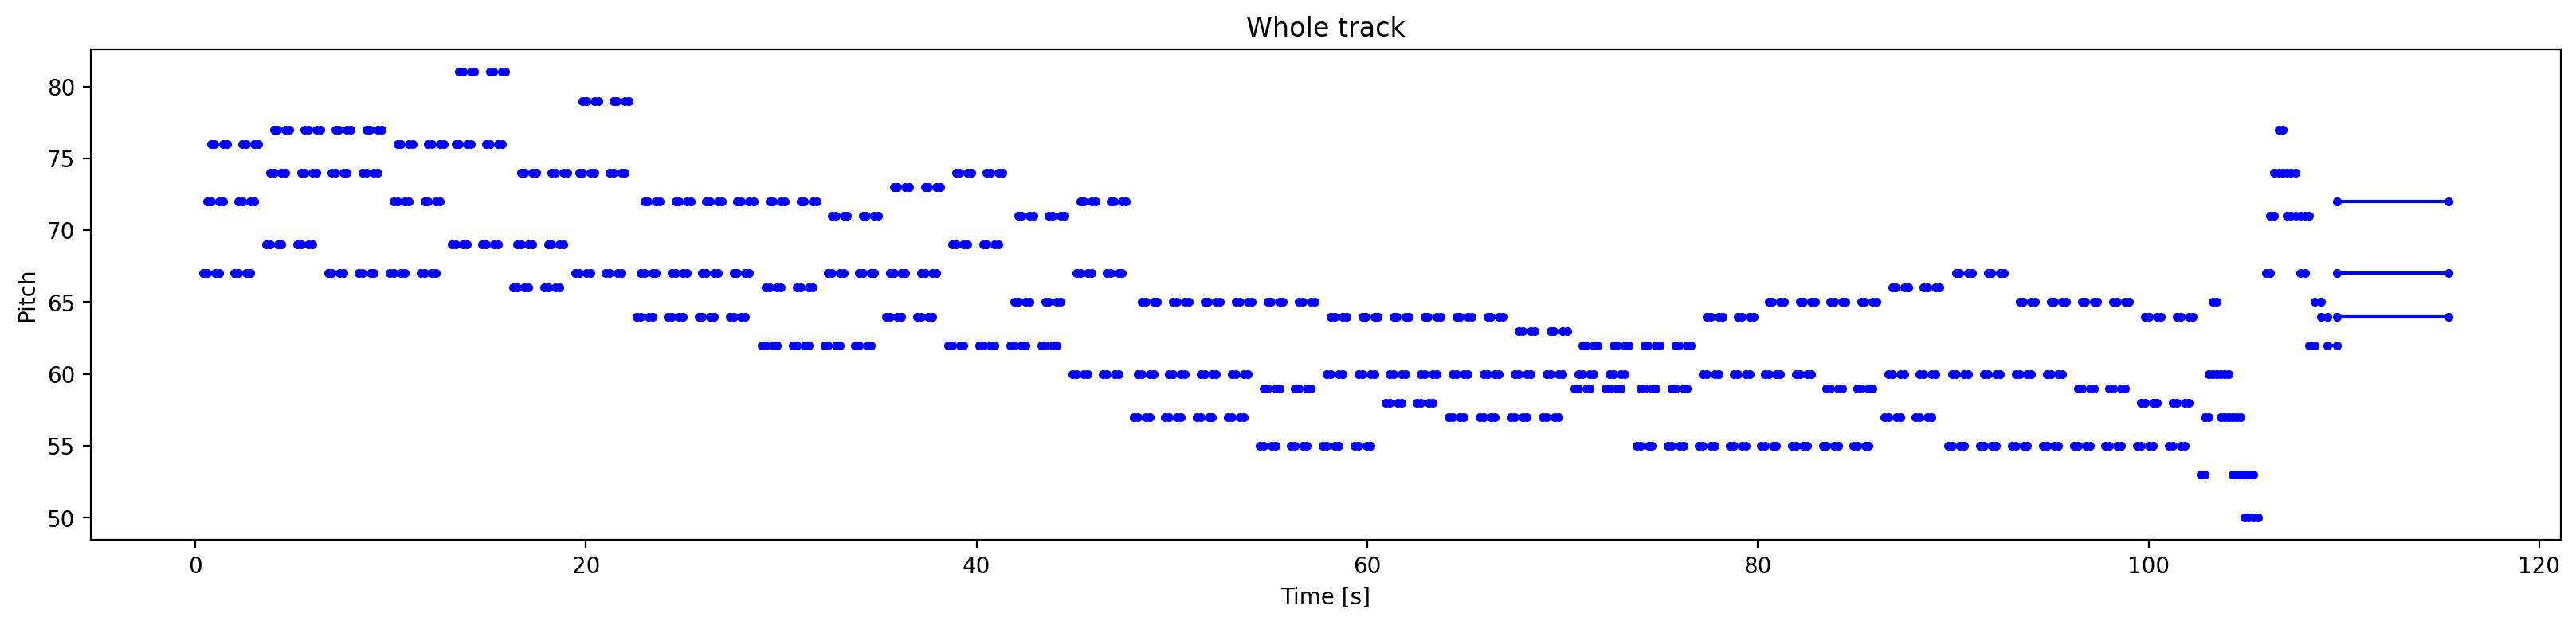

In [23]:
plot_piano_roll(raw_notes)

In [24]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

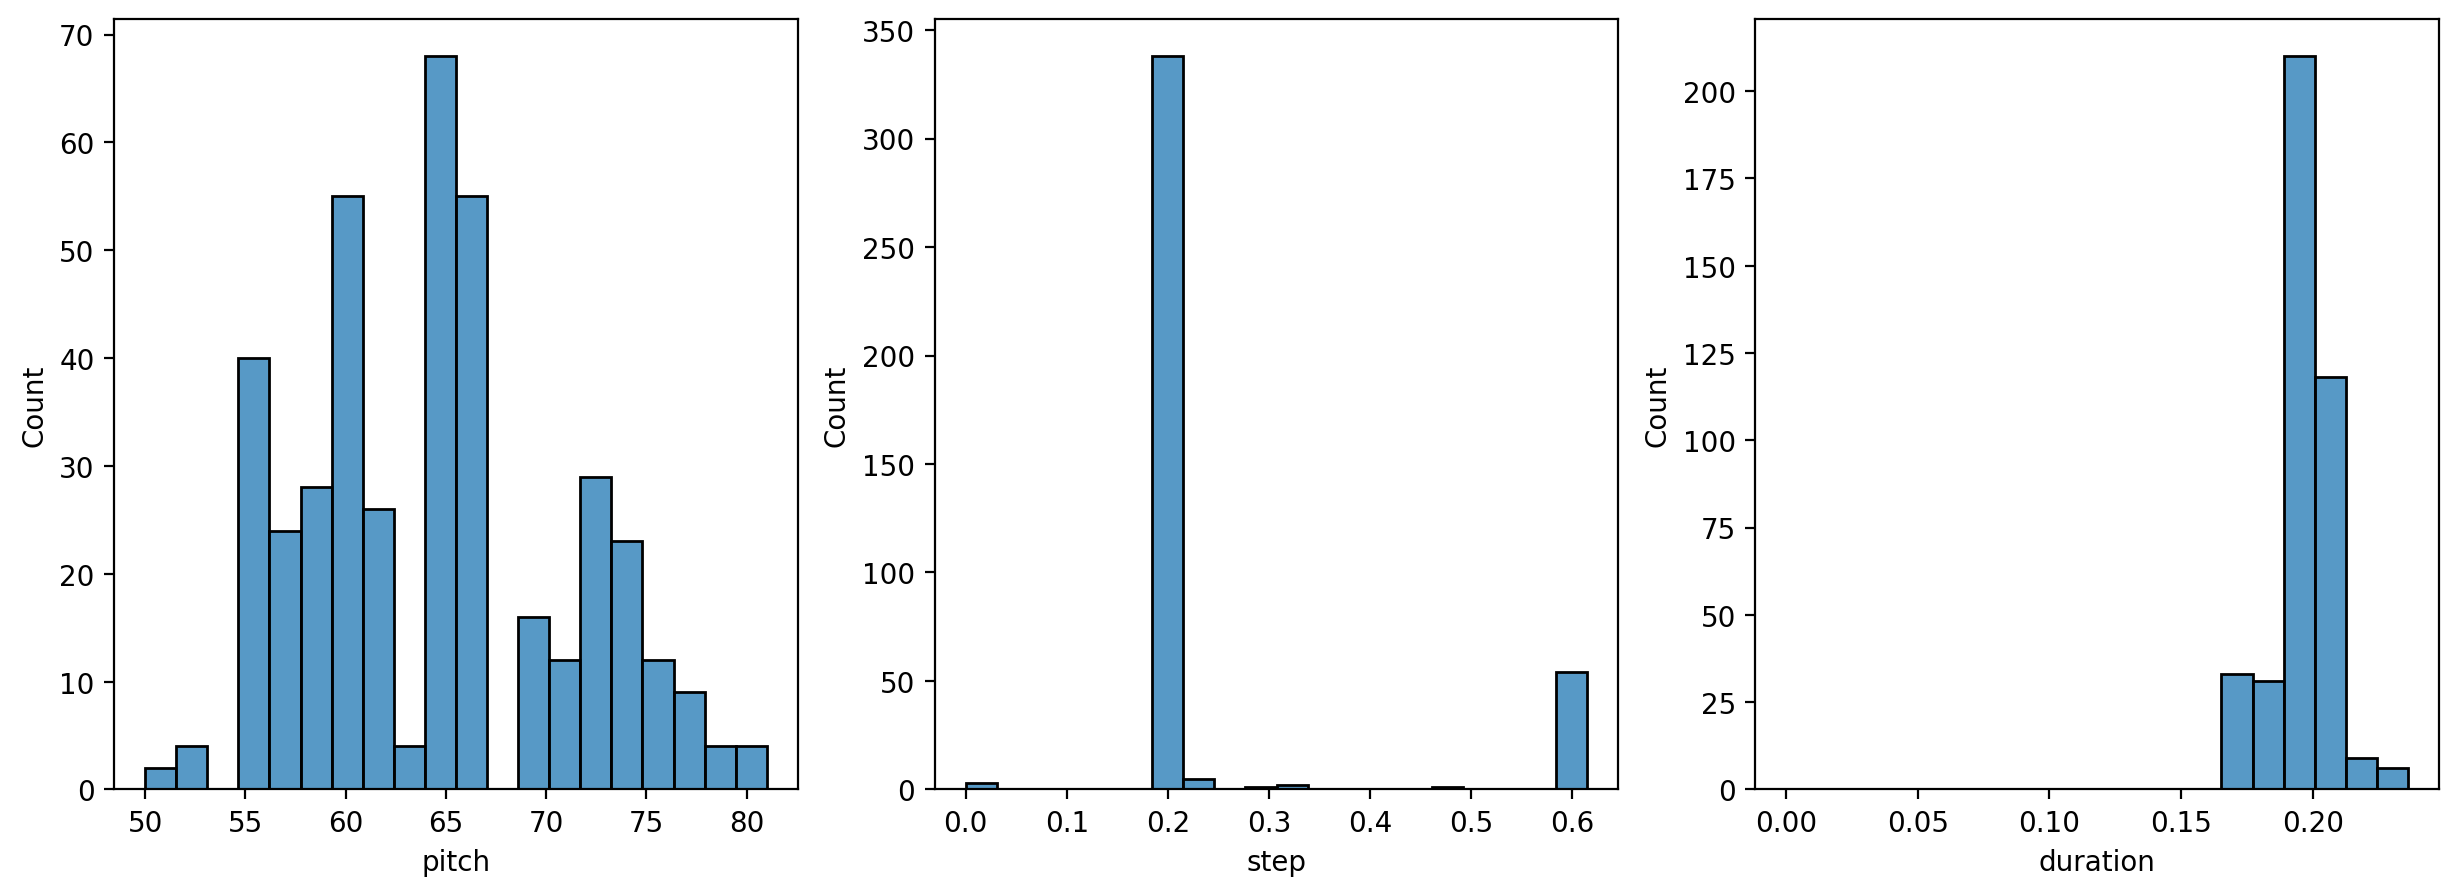

In [25]:
plot_distributions(raw_notes)

In [26]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str,
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [30]:
example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name='Acoustic Grand Piano')

In [32]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [35]:
display_audio(example_pm)

In [39]:
num_files = 5
all_notes = []

filenames = get_all_files(f"./dataset/Bach/")

for f in filenames[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

Number of instruments: 6
Instrument name: Acoustic Grand Piano
Number of instruments: 6
Instrument name: Acoustic Grand Piano
Number of instruments: 5
Instrument name: Acoustic Grand Piano


In [40]:
n_notes = len(all_notes)
print('Number of notes parsed:', n_notes)

Number of notes parsed: 1578


In [42]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [43]:
def create_sequences(
    dataset: tf.data.Dataset,
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [44]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [45]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.578125   0.         0.12152788]
 [0.59375    0.10416675 0.12152788]
 [0.609375   0.10416675 0.12152788]
 [0.5390625  0.10416675 0.10416675]
 [0.609375   0.10416675 0.12152788]
 [0.59375    0.10416675 0.12152788]
 [0.578125   0.10416675 0.12152787]
 [0.6328125  0.10416675 0.10416675]
 [0.578125   0.10416675 0.12152787]
 [0.59375    0.10416675 0.12152787]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=78.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.10416675000000009>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=0.12152787499999995>}


In [47]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

In [48]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

In [49]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}

model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss=loss, optimizer=optimizer)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 25, 3)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 128)            │         67,584 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ duration (Dense)          │ (None, 1)              │            129 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pitch (Dense)             │ (None, 128)            │         16,512 │ lstm[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ step (Dense)              │ (None, 1)              │            129 │ lstm[0][0]             │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 84,354 (329.51 KB)

 Trainable params: 84,354 (329.51 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
losses = model.evaluate(train_ds, return_dict=True)
losses

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - duration_loss: 0.1708 - loss: 5.0501 - pitch_loss: 4.8437 - step_loss: 0.0356


{'duration_loss': 0.09923037886619568,
 'loss': 4.79196310043335,
 'pitch_loss': 4.657164096832275,
 'step_loss': 0.03556850180029869}

In [51]:
model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

In [52]:
model.evaluate(train_ds, return_dict=True)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - duration_loss: 0.1708 - loss: 0.4486 - pitch_loss: 0.2422 - step_loss: 0.0356


{'duration_loss': 0.09923037886619568,
 'loss': 0.3676570951938629,
 'pitch_loss': 0.23285822570323944,
 'step_loss': 0.03556850180029869}

In [54]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}.weights.h5',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [55]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - duration_loss: 0.1539 - loss: 0.4071 - pitch_loss: 0.2365 - step_loss: 0.0167
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - duration_loss: 0.1033 - loss: 0.3015 - pitch_loss: 0.1848 - step_loss: 0.0134
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - duration_loss: 0.0813 - loss: 0.2541 - pitch_loss: 0.1595 - step_loss: 0.0133
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - duration_loss: 0.0692 - loss: 0.2399 - pitch_loss: 0.1582 - step_loss: 0.0124
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - duration_loss: 0.0607 - loss: 0.2293 - pitch_loss: 0.1574 - step_loss: 0.0112
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - duration_loss: 0.0561 - loss: 0.2263 - pitch_loss: 0.1586 - step_loss: 0.0116
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - duration_loss: 0.0477 - loss: 0.2142 - pitch_loss: 0.1561 - step_loss: 0.0103
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - duration_loss: 0.0403 - loss: 0.2071 

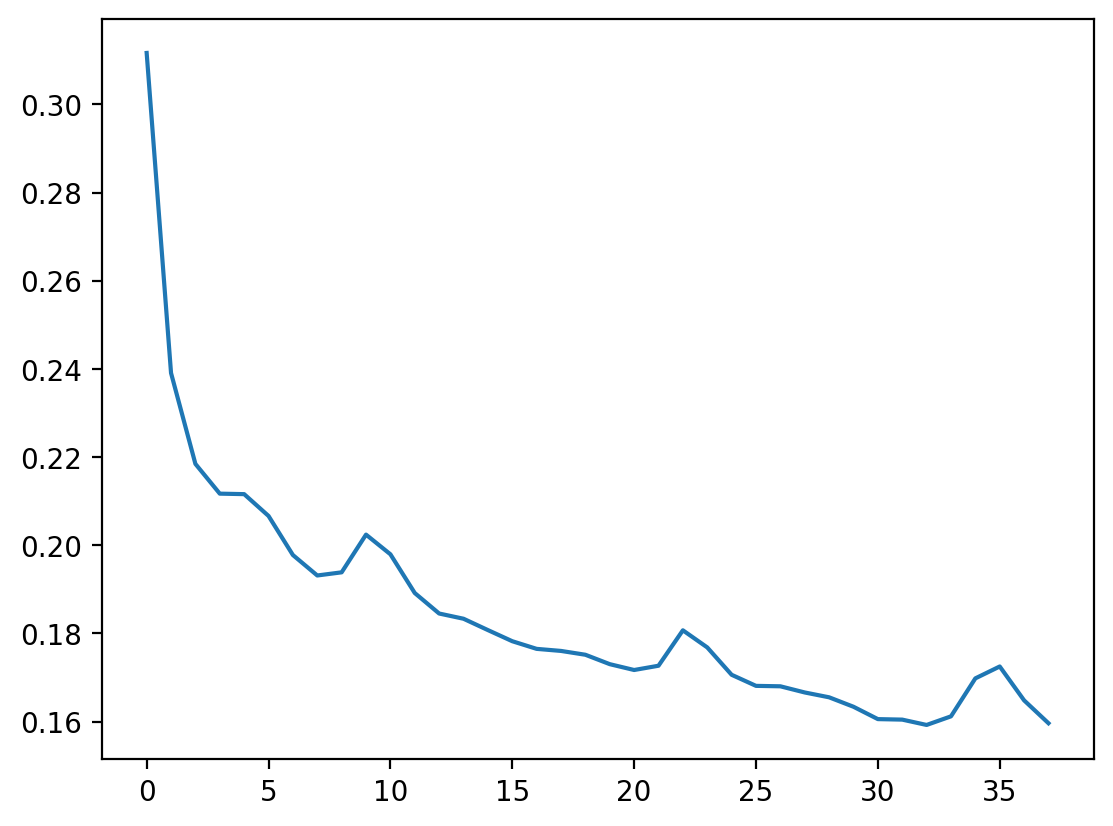

In [56]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.show()

In [57]:
def predict_next_note(
    notes: np.ndarray,
    model: tf.keras.Model,
    temperature: float = 1.0) -> tuple[int, float, float]:
  """Generates a note as a tuple of (pitch, step, duration), using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

In [58]:
temperature = 2.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━

In [59]:
generated_notes.head(10)

,pitch,step,duration,start,end
0,72,0.214292,0.245496,0.214292,0.459789
1,79,1.371340,0.348893,1.585633,1.934525
2,79,1.303790,0.308748,2.889423,3.198171
3,74,1.298040,0.290114,4.187463,4.477577
4,76,1.288402,0.280108,5.475865,5.755973
5,74,1.293443,0.277328,6.769308,7.046636
6,74,1.292604,0.271296,8.061912,8.333208
7,77,1.293993,0.270039,9.355905,9.625945
8,76,1.298451,0.270425,10.654356,10.924782
9,73,1.297631,0.267334,11.951987,12.219321


In [62]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

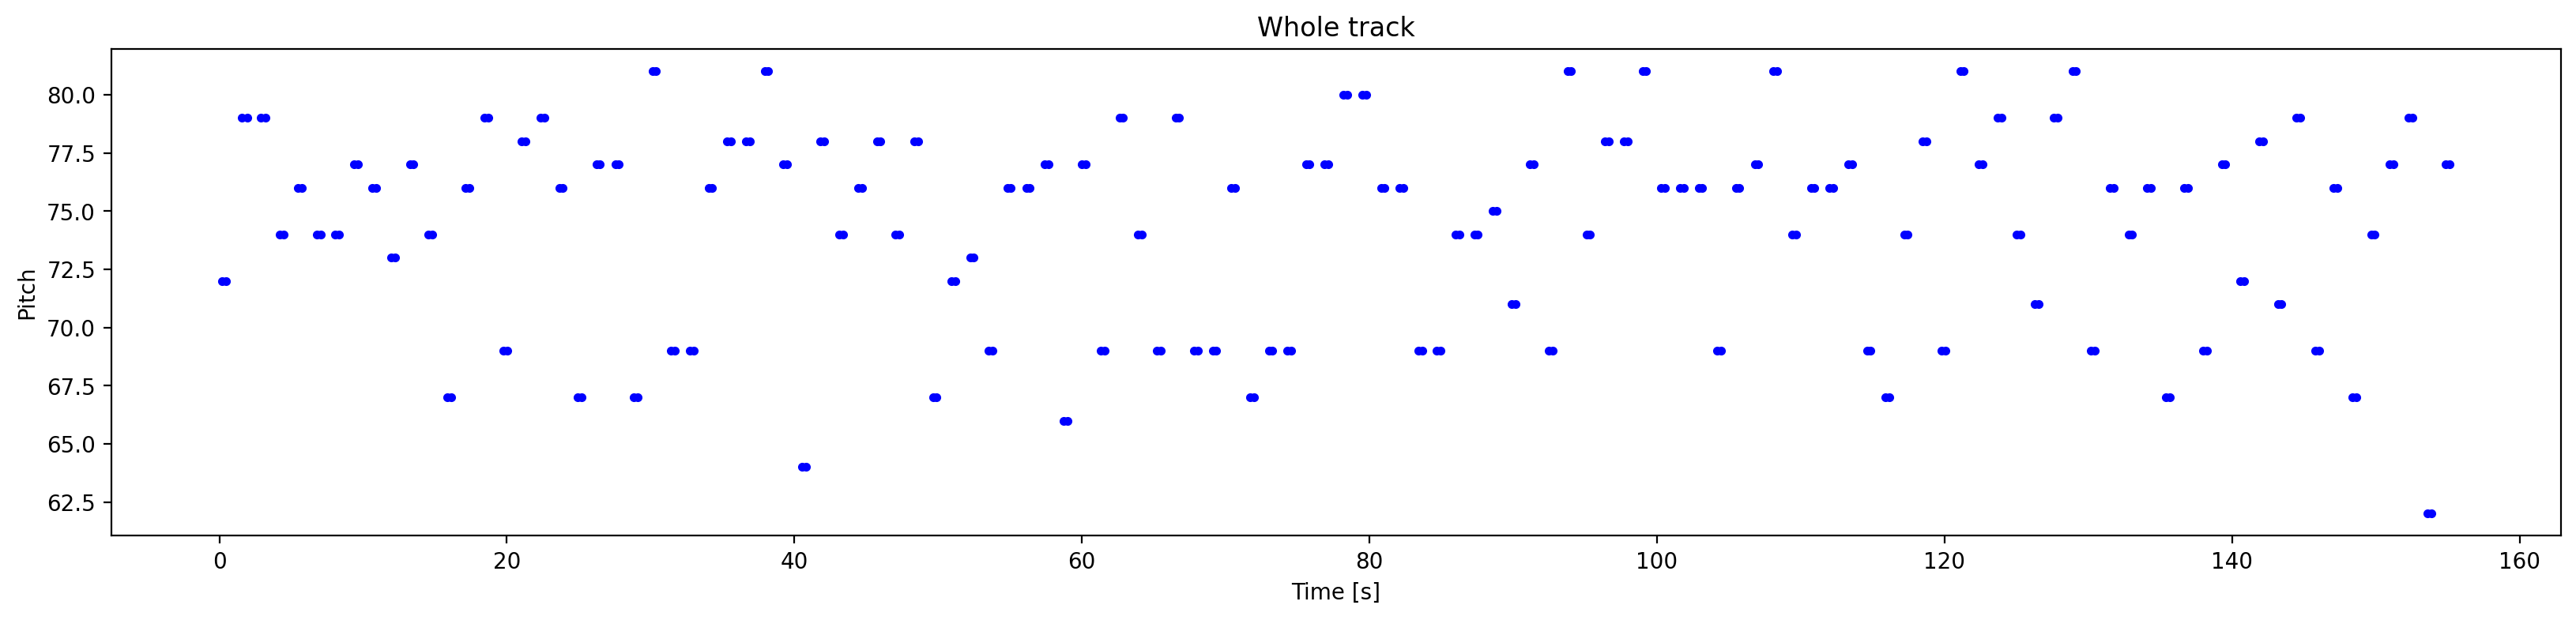

In [63]:
plot_piano_roll(generated_notes)

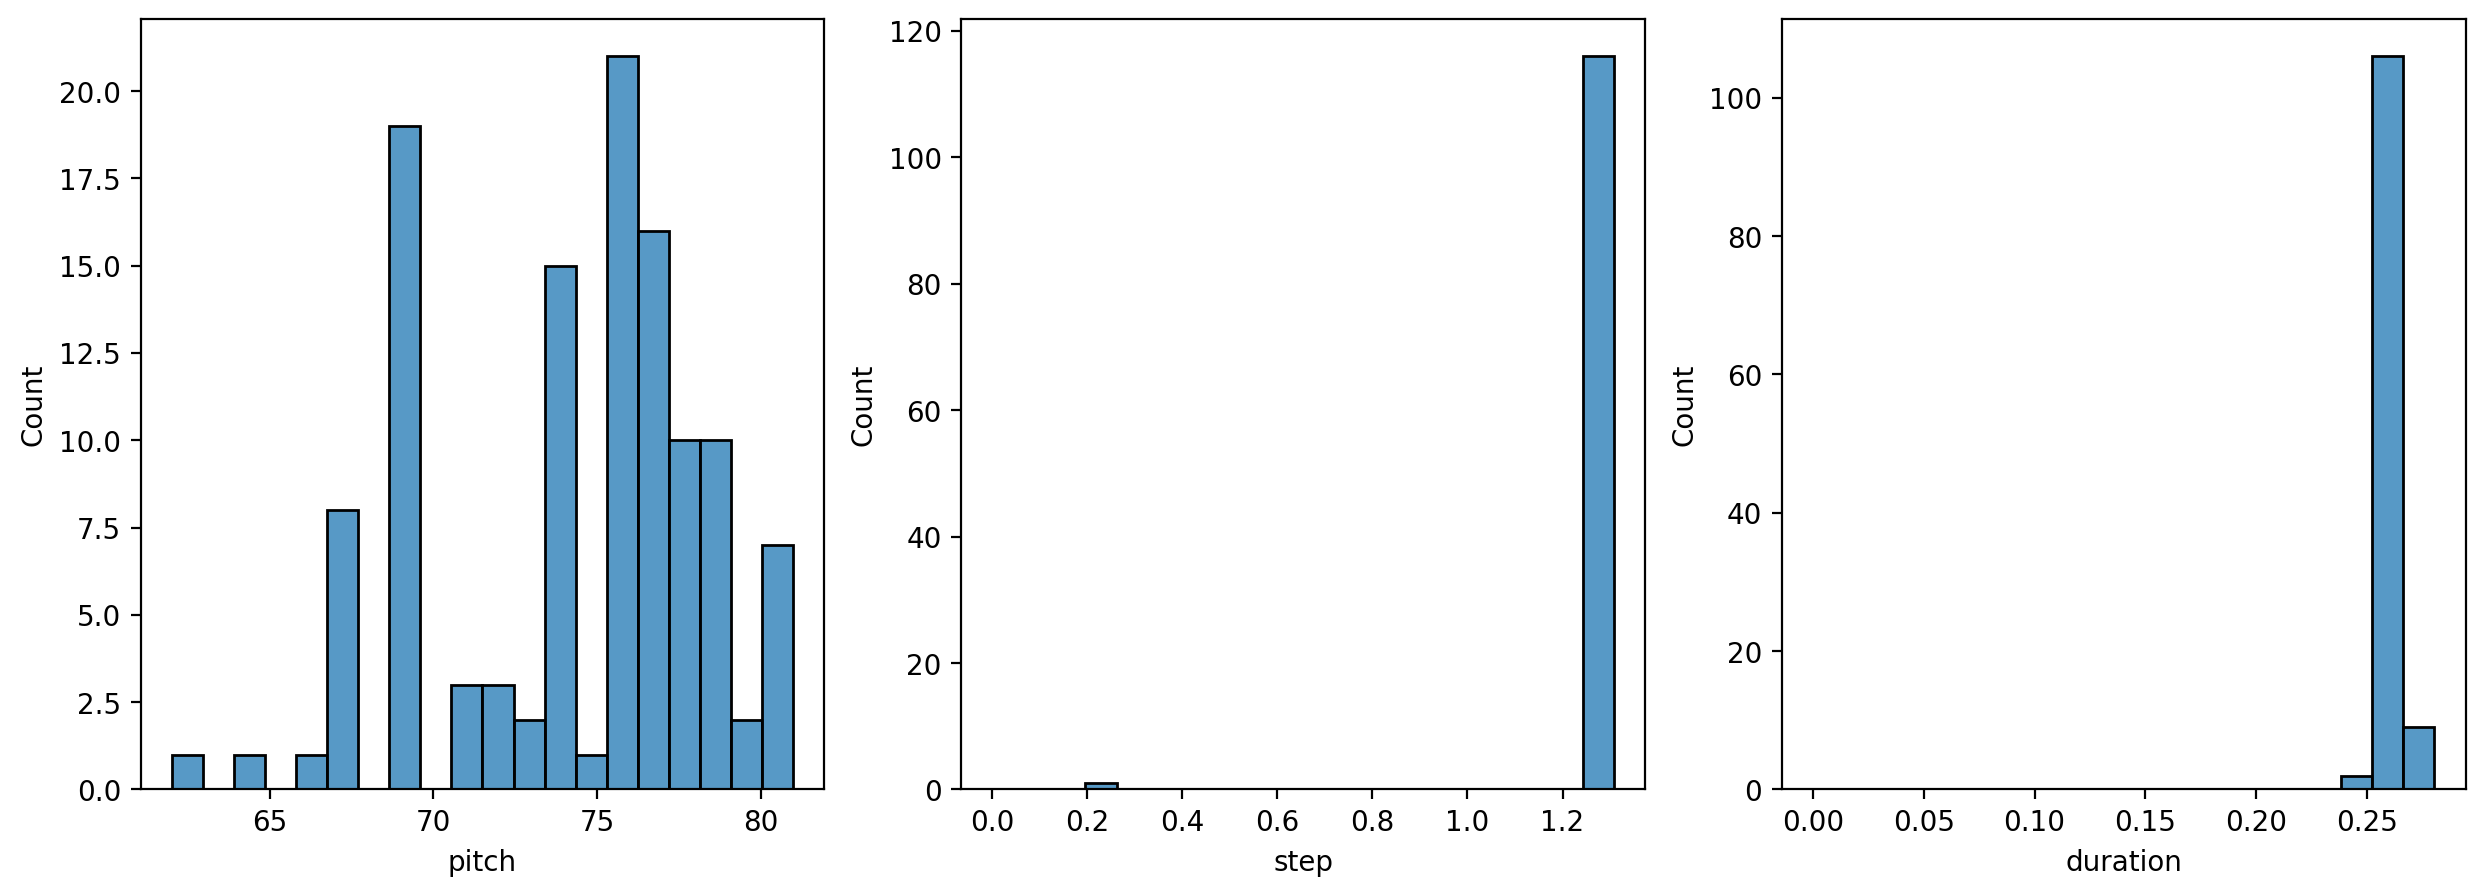

In [64]:
plot_distributions(generated_notes)